In [1]:
%run max_login.py 
import json, warnings ,time #, datetime, 
from tqdm import tqdm
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 999), pd.set_option('display.max_columns', 999), pd.set_option('display.width', 999)   
%matplotlib auto

Login, SK_SUCCESS
Initialize  SK_SUCCESS
GetUserAccount  SK_SUCCESS
ReadCertByID SK_SUCCESS
EnterMonitor, SK_SUCCESS
Using matplotlib backend: Qt5Agg
等待連線..., nkind=  3001
連線成功。 nkind=  3003


In [2]:
%matplotlib inline
def ohlc (ticker, days, period= 4):
    nCode = skQ.SKQuoteLib_RequestKLine( ticker, sKLineType = period, sOutType = 1)
    df = pd.DataFrame(EventQ.KlineData)[days:]
    df.columns = ['date','Open','High','Low','Close','Volume']
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
    return df.astype(float)
# display(ohlc('TX00',-22))
tb = pd.read_excel('https://www.taifex.com.tw/file/taifex/CHINESE/2/2_stockinfo.xls',index=False)
sid = []
for i in list( tb['Unnamed: 2'][2:204].astype(int)): # 若有增刪標的，slice的範圍要check
    if len(str(i)) == 4:
        sid.append(str(i))
########
# 係數 #
########
x1, x2, x3, x4, x5 = 1, 2, 4, 0.03, 1.2
long = []
short = []
for i in tqdm(sid):
    res = ohlc(i, -10)
    try:
        if ( (len([res['Open'] > res['Close'].shift()*1.02]) >= x1) 
        & (len(res[res['Close'] > res['Open']*1.03]) >= x2) 
        & (len( res[(res['High'] > res['High'].shift()) & ( res['Low'] > res['Low'].shift())] ) >= x3) 
        & (res['Close'][-1]*(1+x4) >= res['High'][-10:].max()) 
        & (res['Volume'][-3:].mean() > res['Volume'][-10:].mean()*x5) ):
            long.append(i) 
        elif ( (len(res[res['Open'] < res['Close'].shift()*0.98]) >= x1 )
        &(len(res[res['Close']*1.03 < res['Open']]) >= x2 )
        &(len(res[ (res['High'] < res['High'].shift()) &(res['Low'] < res['Low'].shift()) ]) >= x3)
        &(res['Close'][-1]*(1-x4) <= res['Low'][-10:].min())
        &(len( res[res['Close'] < res['Open']] [res['High'] > res['Open']*1.01] ) >= 1) ):
            short.append(i) 
        else: pass
    except Exception as e:
        print('公司',i,'報價有誤，或許近日曾被暫停交易' )
print(f'做多{long}\n放空{short}')       

100%|██████████████████████████████| 196/196 [02:50<00:00,  1.03s/it]


做多['2376', '4736', '5269', '5269']
放空[]


In [3]:
def voladay (ticker):
    df = ohlc(ticker, -66)
    return ((df['High']- df['Low'])/ df['Close'].shift(1)* 100).rolling(22).mean()
keys = tb['Unnamed: 2'][2:204] # 若股票期貨發行數量有增or刪，則slice範圍需調整
values = tb['Unnamed: 3'][2:204]
futures = {i:j for j,i in zip(keys,values)}
vola_day = pd.DataFrame({ i : voladay(str(j)).dropna() for i,j in tqdm(futures.items())})
vola_day.tail().sort_values(by = vola_day.index[-1], ascending= False, axis= 1)

100%|██████████████████████████████| 197/197 [05:40<00:00,  1.82s/it]


,隆達,祥碩,同致,大江,晶技,網家,台表科,為升,南電,晶電,同欣電,華新科,友訊,精英,智邦,力成,臻鼎-KY,晶豪科,精測,宣德,國巨,美利達,泰博,台燿,華通,璟德,聯茂,先豐,亞德客-KY,欣興,力旺,智擎,嘉澤,億光,神盾,景碩,信昌電,聯亞,金居,玉晶光,嘉聯益,元太,原相,兆赫,新日興,晟德,穩懋,胡連,上銀,全新,台光電,和大,樺漢,台郡,旺宏,榮成,威剛,宏捷科,大同,碩禾,智原,百和,中環,敬鵬,健鼎,技嘉,創意,合晶,儒鴻,可成,瑞昱,台半,致茂,華邦電,精華,友達,聯詠,亞光,光磊,凌陽,TPK-KY,台虹,義隆,中租-KY,南亞科,長榮航,欣銓,京元電子,世界,群創,台達電,聚陽,微星,環球晶,大立光,明泰,彩晶,國喬,新普,川湖,中美晶,宏達電,啟碁,正新,頎邦,聯發科,遠東新,長榮,正崴,群聯,大成鋼,達方,瑞軒,中纖,日月光投控,聯電,寶成,農林,冠德,南亞,東陽,矽格,神達,廣宇,順達,華新,佳世達,宏碁,美律,大成,瑞儀,漢唐,中石化,中壽,康舒,葡萄王,中工,宏全,彰銀,中光電,緯創,鴻準,元大金,台灣高鐵,台化,聯強,東洋,永豐金,台塑,廣達,群益深証中小ETF,南僑,臺企銀,和碩,興富發,亞泥,中信金,富邦金,榮剛,華碩,東元,台新金,森鉅,鴻海,大聯大,英業達,光寶科,開發金,統一,精誠,新光金,華南金,仁寶,第一金,富邦深100ETF,遠傳,兆豐金,台積電,玉山金,合庫金,中鋼,潤泰全,潤泰新,富邦上証ETF,文曄,國泰金,FH滬深ETF,國泰中國A50ETF,長虹,台泥,華固,元大上證50ETF,元大寶滬深ETF,元大台灣50ETF,元大高股息ETF,台灣大,中華電
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-11,4.974390,5.305649,4.898319,4.505036,5.029111,5.426077,4.748467,4.585834,4.931342,4.394462,4.038453,4.310702,4.187208,4.358029,4.368873,4.036358,4.321944,4.079527,4.402434,4.161179,4.034308,4.432610,3.797540,3.574866,3.946403,4.214256,3.797854,4.142714,4.006233,4.066583,3.840085,3.957812,3.542920,3.656470,3.743146,4.022132,3.878302,3.773721,3.530929,3.793955,3.363938,2.977604,3.679651,3.546906,3.442748,3.176185,3.497282,3.342053,3.585596,3.343408,3.131027,3.320804,3.157632,3.312035,3.174791,3.289454,3.112854,3.235969,3.195593,3.076541,3.158240,3.321958,2.884525,3.081162,2.946141,2.730175,3.419500,2.948075,3.503432,3.000907,2.852338,2.950623,3.124164,3.151984,2.990105,3.051823,2.849250,3.100606,2.818480,2.996841,3.186858,2.743790,2.715718,2.896156,2.872591,3.321993,2.798236,2.834769,2.522697,2.841698,2.758353,3.096214,2.137688,2.703318,2.835459,3.238719,2.657938,2.591189,2.556414,2.796643,2.566789,2.688671,2.687051,2.763586,2.506815,2.498122,2.740749,2.822764,2.456030,2.422948,2.474894,2.512070,2.554318,2.565838,2.599424,2.528491,2.529582,2.687342,2.512193,2.634459,2.328696,2.258035,2.302659,2.364755,2.065357,2.636616,2.148821,2.270000,2.153724,1.902442,2.390092,1.859031,2.166392,2.487543,2.174601,2.011528,2.403851,2.012922,2.108322,2.143919,1.972137,2.010149,2.117756,2.024928,1.847281,1.612671,1.966012,1.983036,1.906729,1.857749,1.889960,1.685843,2.053444,1.836591,1.784489,1.843802,1.974449,1.895576,1.670698,1.452779,2.128178,1.818304,1.585974,1.604753,1.544158,1.590509,1.568946,1.804306,1.600202,1.574551,1.829348,1.684176,1.436933,1.725256,1.526243,1.440741,1.530861,1.472440,1.673390,1.612543,1.370187,1.427199,1.355975,1.378410,1.501575,1.508629,1.326683,1.319430,1.385790,1.352550,1.374530,1.235816,1.206969,1.276338,1.172304,1.135027,0.856350
2020-05-12,5.044492,5.299905,5.024999,4.454401,5.016186,5.250068,4.740387,4.525311,4.986965,4.219735,4.098703,4.153993,4.106398,4.290759,4.305374,4.048886,4.260808,4.081262,4.317300,4.023862,4.018028,4.383885,3.649101,3.716820,3.819703,4.181733,3.814070,4.045611,3.817122,3.952345,3.835950,3.918930,3.543210,3.591628,3.640209,3.944873,3.727647,3.714448,3.527506,3.625478,3.322185,3.081507,3.568187,3.424388,3.361692,3.157079,3.492016,3.421042,3.568869,3.262555,3.135152,3.346656,3.105678,3.238481,3.091504,3.216365,3.146920,3.200879,3.172210,2.956567,3.106722,3.227003,2.932038,3.054547,2.969201,2.836375,3.285749,2.886043,3.508477,2.892966,2.871354,2.893419,3.059785,3.088620,3.019733,3.013015,2.873252,3.030168,2.811427,2.952530,3.053038,2.734753,2.713836,2.845892,2.770057,3.031036,2.768856,2.782605,2.552507,2.821911,2.728483,2.971805,2.268628,2.626618,2.690862,3.177663,2.604074,2.629859,2.549494,2.753135,2.475582,2.587591,2.579863,2.642495,2.405990,2.448550,2.705028,2.634415,2.399674,2.343232,2.424741,2.402111,2.487039,2.553258,2.589880,2.519873,2.485824,2.531990,2.509176,2.582795,2.296948,2.227896,2.251057,2.319642,2.041070,2.533665,2.090025,2.169014,2.049503,2.008442,2.253229,1.922456,2.114501,2.404068,2.076822,1.964325,2.254634,1.953062,2.072872,2.082274,1.973277,1.867431,2.099

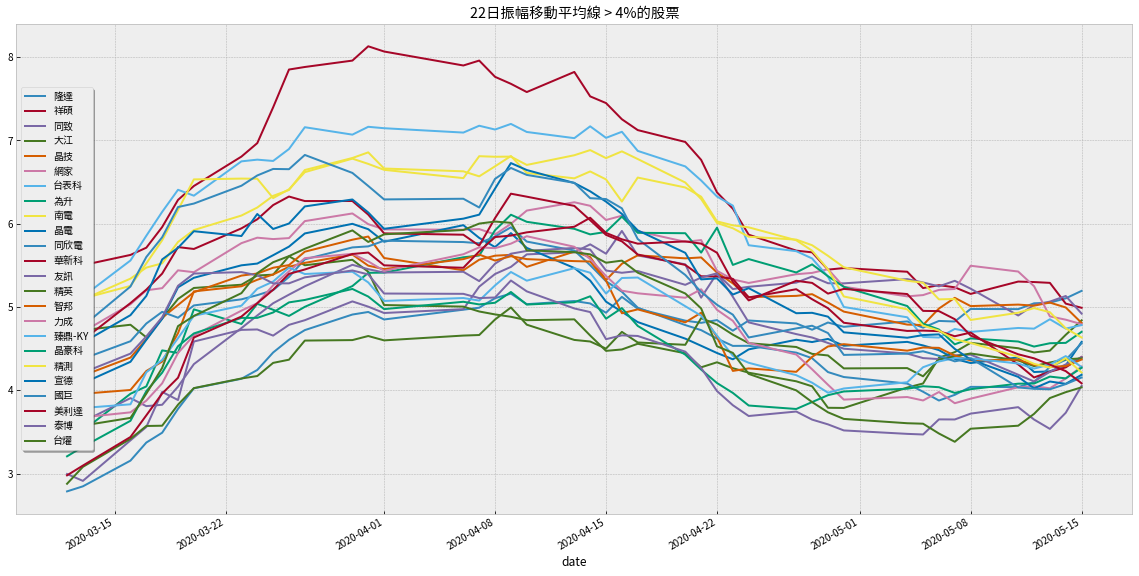

<Figure size 432x288 with 0 Axes>

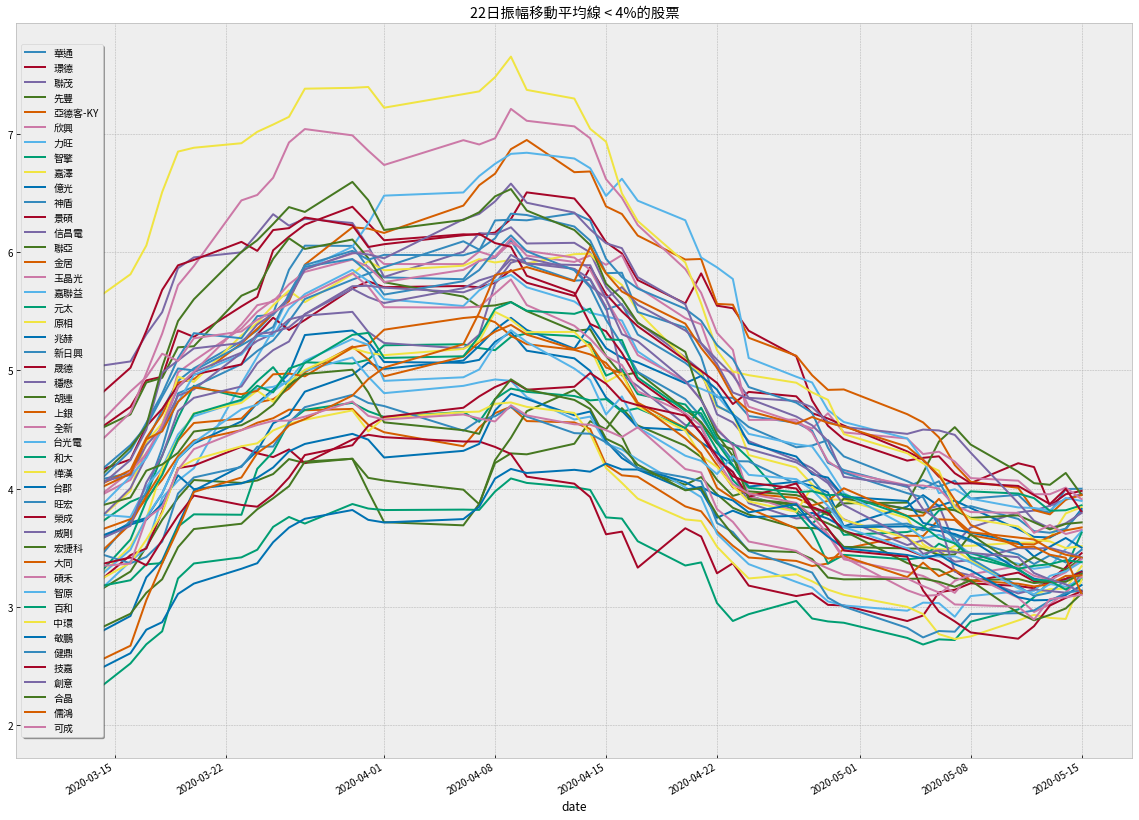

In [4]:
threshold = 4
full = vola_day.sort_values(by = vola_day.index[-1], ascending= False, axis= 1).iloc[:,:70] # 只抓振幅排序前70名
high_vola = full[full.loc[full.index[-1]] [full.loc[full.index[-1]] > threshold].index]
low_vola = full[full.loc[full.index[-1]] [full.loc[full.index[-1]] < threshold].index]
# print(high_vola.shape, low_vola.shape)
high_vola.plot(figsize=(20, 10), title= f'22日振幅移動平均線 > {threshold}%的股票')
plt.legend(loc= 6, shadow=True)
plt.figure()
low_vola.plot(figsize=(20, 15), title= f'22日振幅移動平均線 < {threshold}%的股票')
plt.legend(loc= 6, shadow=True)

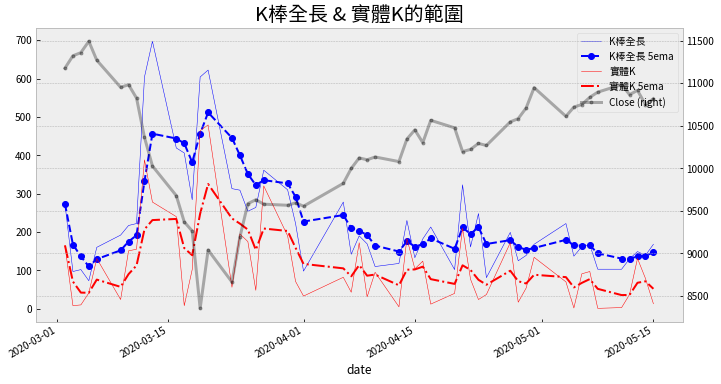

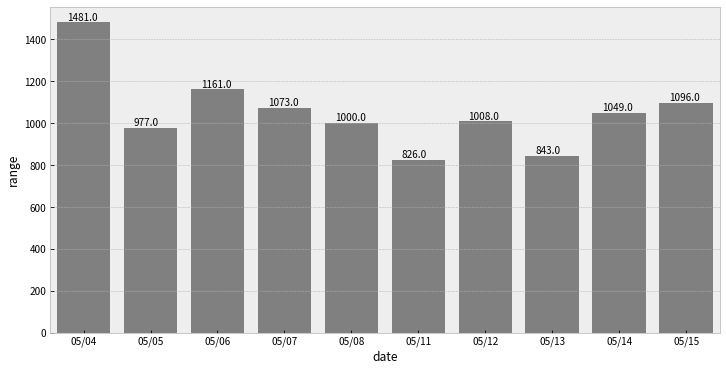

In [5]:
df = ohlc('TX00', -90).last('3M')
plt.title('K棒全長 & 實體K的範圍', fontsize= 20)
(df['High']-df['Low']).plot(figsize=(11.6, 6),color='b',lw=0.5, label='K棒全長')
(df['High']-df['Low']).ewm(span=5).mean().plot(style='bo--',lw=2, label='K棒全長 5ema') # 嚐試用ema而非傳統ma
abs(df['Open']-df['Close']).plot(color='r',lw=0.5, label='實體K')
abs(df['Open']-df['Close']).ewm(span=5).mean().plot(style='r-.',lw=2, label='實體K 5ema')
plt.legend(loc= 0, shadow=True)
df['Close'].plot(secondary_y=True, legend='打字沒用 會顯示欄名', style='k.-', lw= 3, alpha= 0.3)

import seaborn as sns
def diff_vola():            
    df= ohlc('TX00', -3000, 0).last('14B') # 一天300，若函蓋到月結算就要扣 15個1分K
    data= pd.DataFrame()
    data['High'] = df['High'].resample('5T', label = 'right', closed = 'right').max()
    data['Low'] = df['Low'].resample('5T', label ='right', closed = 'right').min()
    data['range'] = data['High'] - data['Low']
    data= data.dropna()
    return data['range']
df = diff_vola().resample('D').sum() # 為了省事不用一天幾根1分k篩，而是用business day篩，導致非週末休市出現0值
df = df[~df.isin([0])][-10:] # 反選取 篩掉週間休市的日期
plt.figure(figsize=(12,6))
sns.barplot(x = df.index.strftime('%m/%d') ,y= df, color ='grey')
for i, j in enumerate(df):
    plt.text(i - 0.25 , j + 10.5, f'{j}')